<a href="https://colab.research.google.com/github/sajedehfarahbod/deep-learning-for-cell-culture/blob/main/final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
df = pd.read_csv("data1.csv")
df

,Mu,Dl,Lb,Tcyc,YFP,schnitzNum
0,2.212869,1.756951,2.035147,25.325000,106.822445,95
1,2.145022,1.322694,2.725876,15.191667,110.307318,96
2,2.187034,1.976408,1.908797,28.533333,108.416709,97
3,1.902761,1.642699,2.023156,26.191667,115.020217,105
4,2.288025,2.117081,2.064866,28.200000,117.617110,107
...,...,...,...,...,...,...
1214,0.575907,1.251254,1.131423,113.416667,442.308698,3037
1215,1.135137,1.590728,1.171979,59.466667,226.018277,3120
1216,1.217607,1.676881,1.575631,50.575000,146.294287,3122
1217,0.759511,1.286445,1.253480,72.666667,475.679082,3123


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Mu          1219 non-null   float64
 1   Dl          1219 non-null   float64
 2   Lb          1219 non-null   float64
 3   Tcyc        1219 non-null   float64
 4   YFP         1219 non-null   float64
 5   schnitzNum  1219 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 57.3 KB


In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
df['schnitzNum'] = df['schnitzNum'].astype(float)

In [ ]:
df.describe()

,Mu,Dl,Lb,Tcyc,YFP,schnitzNum
count,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000
mean,1.628015,1.651759,1.817942,50.214479,213.592913,1483.433962
std,0.716365,0.583669,0.479718,44.599995,233.858653,797.590470
min,0.149448,0.318124,0.813265,12.491667,-13.219512,95.000000
25%,0.964104,1.150776,1.384697,26.316667,14.376724,792.500000
50%,1.920696,1.579605,1.877603,31.466667,119.862253,1521.000000
75%,2.223870,2.106683,2.182502,52.691667,365.426252,2127.500000
max,2.881788,4.078753,3.824417,332.791667,1066.610168,3152.000000


array([[<Axes: title={'center': 'Mu'}>, <Axes: title={'center': 'Dl'}>],
       [<Axes: title={'center': 'Lb'}>, <Axes: title={'center': 'Tcyc'}>],
       [<Axes: title={'center': 'YFP'}>,
        <Axes: title={'center': 'schnitzNum'}>]], dtype=object)

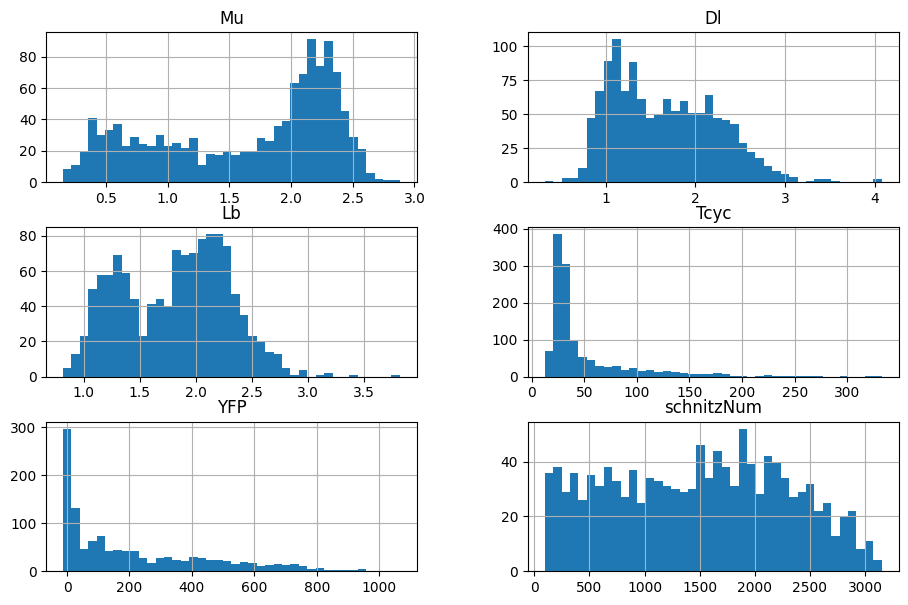

In [ ]:
df.hist(bins=40, figsize=(11,7))

In [ ]:
weight = 0.7
bias = 0.3

In [ ]:
X = df.iloc[:, :-1].values  # Features (all rows, all columns except the last)
y = df.iloc[:, -1].values  # Target variable (all rows, last column)


In [ ]:
len(X), len(y)

(1219, 1219)

In [ ]:
print(f"Current length of x: {len(X)}")
print(f"Current data type of x: {type(X)}")

print(f"Current length of y: {len(y)}")
print(f"Current data type of y: {type(y)}")

Current length of x: 1219
Current data type of x: <class 'numpy.ndarray'>
Current length of y: 1219
Current data type of y: <class 'numpy.ndarray'>


In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(array([[  1.66187366,   1.20915399,   1.62347839,  32.66666667,
         210.9190376 ],
        [  1.95114723,   2.25175841,   1.99584571,  32.68333333,
          15.9829154 ],
        [  2.11899563,   1.56160806,   1.99929838,  25.375     ,
          99.54904665],
        ...,
        [  0.88077143,   1.02610888,   1.29933346,  66.03333333,
         430.5104693 ],
        [  0.81317902,   1.16017449,   1.53728166,  55.81666667,
         416.1944644 ],
        [  0.61255547,   1.07455747,   1.21202959,  91.38333333,
         592.8482421 ]]),
 array([[  2.29504689,   2.08673938,   2.11299981,  27.18333333,
          17.0523495 ],
        [  2.0783104 ,   1.8368574 ,   1.72412961,  29.40833333,
          20.4938316 ],
        [  2.23592182,   2.57587284,   2.00871295,  31.425     ,
          79.10681278],
        ...,
        [  2.43162656,   2.35018362,   2.14689634,  27.35      ,
          95.98423042],
        [  0.70619012,   1.05468717,   1.10918119,  81.45      ,
         483.0162

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(975, 975, 244, 244)

In [ ]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)


In [ ]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

In [ ]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

In [ ]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [ ]:
import torch
import numpy as np

In [ ]:
X_train = torch.tensor([[1.0], [2.0], [3.0]], dtype=torch.float32)
y_train = torch.tensor([2.0, 4.0, 6.0], dtype=torch.float32)

# داده‌های تست
X_test = torch.tensor([[4.0], [5.0]], dtype=torch.float32)
y_test = torch.tensor([8.0, 10.0], dtype=torch.float32)




In [ ]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100
# تعریف تابع هزینه و بهینه‌ساز
loss_fn = torch.nn.MSELoss()
model_0 = torch.nn.Linear(1, 1)  # مدل ساده خطی
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

# ایجاد لیست‌های خالی برای مقادیر هزینه
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    #print(y_pred)
    y_pred = model_0(X_train)
    # 2. Calculate the loss (how different are our models predictions to the ground tru
    loss = loss_fn(y_pred, y_train)
    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 5.748948574066162 | MAE Test Loss: 20.946195602416992 
Epoch: 10 | MAE Train Loss: 4.022207736968994 | MAE Test Loss: 9.794206619262695 
Epoch: 20 | MAE Train Loss: 3.8078765869140625 | MAE Test Loss: 7.52473258972168 
Epoch: 30 | MAE Train Loss: 3.739901304244995 | MAE Test Loss: 7.098280429840088 
Epoch: 40 | MAE Train Loss: 3.6880979537963867 | MAE Test Loss: 7.16611909866333 
Epoch: 50 | MAE Train Loss: 3.6399645805358887 | MAE Test Loss: 7.383166313171387 
Epoch: 60 | MAE Train Loss: 3.594210624694824 | MAE Test Loss: 7.647356033325195 
Epoch: 70 | MAE Train Loss: 3.5506181716918945 | MAE Test Loss: 7.926736831665039 
Epoch: 80 | MAE Train Loss: 3.5090761184692383 | MAE Test Loss: 8.210991859436035 
Epoch: 90 | MAE Train Loss: 3.4694855213165283 | MAE Test Loss: 8.496637344360352 


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


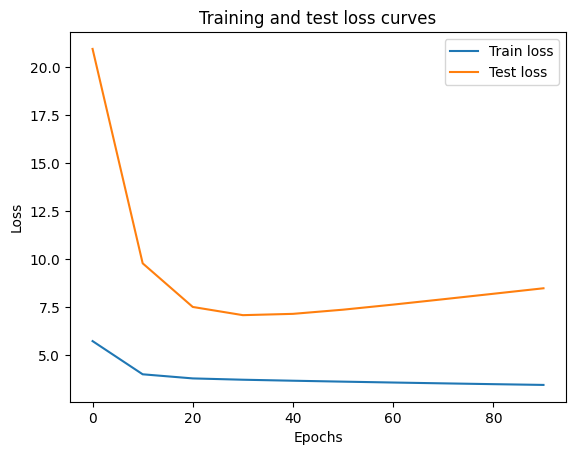

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weight', tensor([[1.0159]])), ('bias', tensor([1.6906]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [ ]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[5.7542],
        [6.7701]])

In [ ]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 2
Number of predictions made: 2
Predicted values:
tensor([[5.7542],
        [6.7701]])


In [ ]:
import matplotlib.pyplot as plt
import torch

# تابع برای رسم پیش‌بینی‌ها
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions):
    plt.figure(figsize=(10, 6))

    # رسم داده‌های آموزشی
    plt.scatter(train_data, train_labels, c='b', label='Training data')

    # رسم داده‌های تست
    plt.scatter(test_data, test_labels, c='g', label='Testing data')

    # رسم پیش‌بینی‌ها
    plt.scatter(test_data, predictions, c='r', label='Predictions')

    plt.legend()
    plt.show()

# بررسی و تبدیل داده‌ها به numpy array در صورت نیاز
def to_numpy(tensor):
    if isinstance(tensor, torch.Tensor):
        return tensor.numpy()
    elif isinstance(tensor, np.ndarray):
        return tensor
    else:
        raise TypeError("Input should be a torch.Tensor or numpy.ndarray")

# داده‌های آموزشی (فرض کنید که این‌ها از قبل به صورت numpy.ndarray یا torch.Tensor تعریف شده‌اند)
X_train = np.array([[1.0], [2.0], [3.0]], dtype=np.float32)
y_train = np.array([2.0, 4.0, 6.0], dtype=np.float32)

# داده‌های تست
X_test = np.array([[4.0], [5.0]], dtype=np.float32)
y_test = np.array([8.0, 10.0], dtype=np.float32)

# مدل شما (فرض کنید که مدل آموزش دیده است)
model_0 = torch.nn.Linear(1, 1)  # مثال از یک مدل ساده
model_0.eval()

# تبدیل داده‌ها به تنسور PyTorch در صورت نیاز
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# محاسبه پیش‌بینی‌ها
with torch.no_grad():
    y_preds = model_0(X_test_tensor).detach().numpy()

# تبدیل داده‌ها به numpy array برای استفاده در matplotlib
X_train_np = to_numpy(X_train)
y_train_np = to_numpy(y_train)
X_test_np = to_numpy(X_test)
y_test_np = to_numpy(y_test)




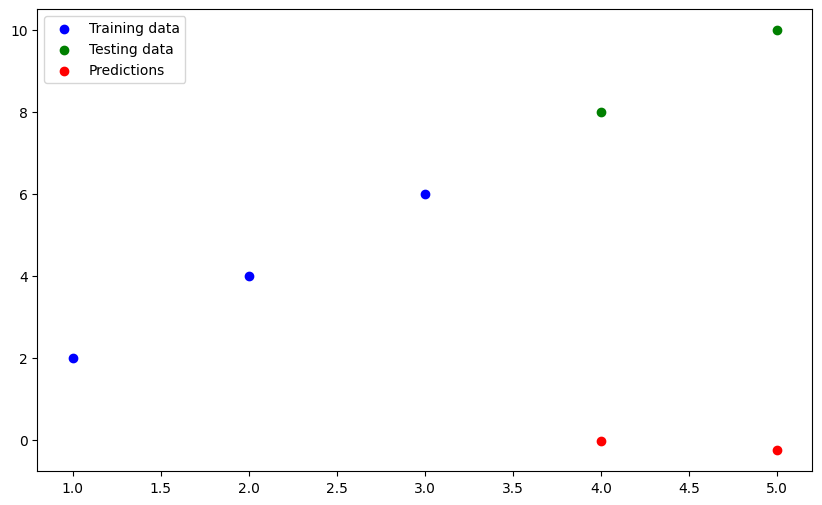

In [ ]:
# فراخوانی تابع plot_predictions
plot_predictions(train_data=X_train_np, train_labels=y_train_np,
                 test_data=X_test_np, test_labels=y_test_np,
                 predictions=y_preds)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

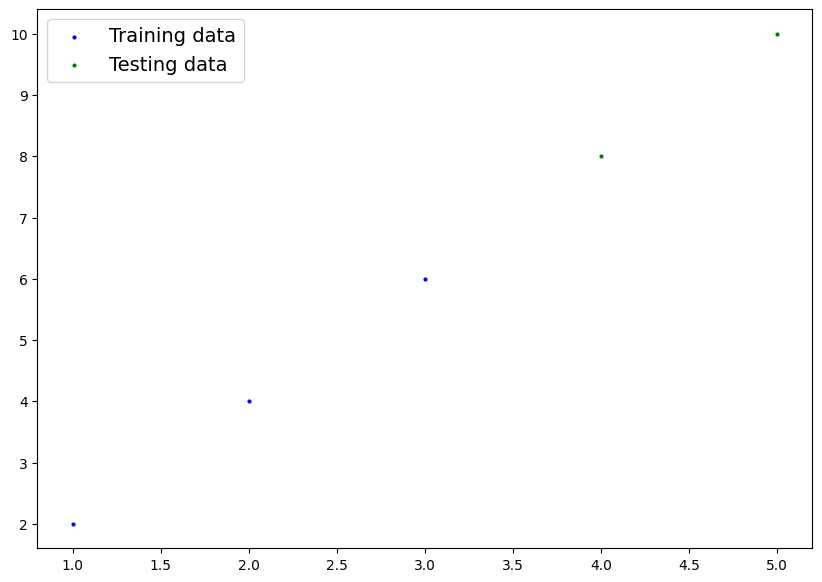

In [ ]:
plot_predictions();

In [ ]:
X_train = torch.tensor([[1.0], [2.0], [3.0]], dtype=torch.float32)
y_train = torch.tensor([2.0, 4.0, 6.0], dtype=torch.float32)

# داده‌های تست
X_test = torch.tensor([[4.0], [5.0]], dtype=torch.float32)
y_test = torch.tensor([8.0, 10.0], dtype=torch.float32)

In [ ]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

In [ ]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 2
Number of predictions made: 2
Predicted values:
tensor([[-0.0185],
        [-0.2528]])


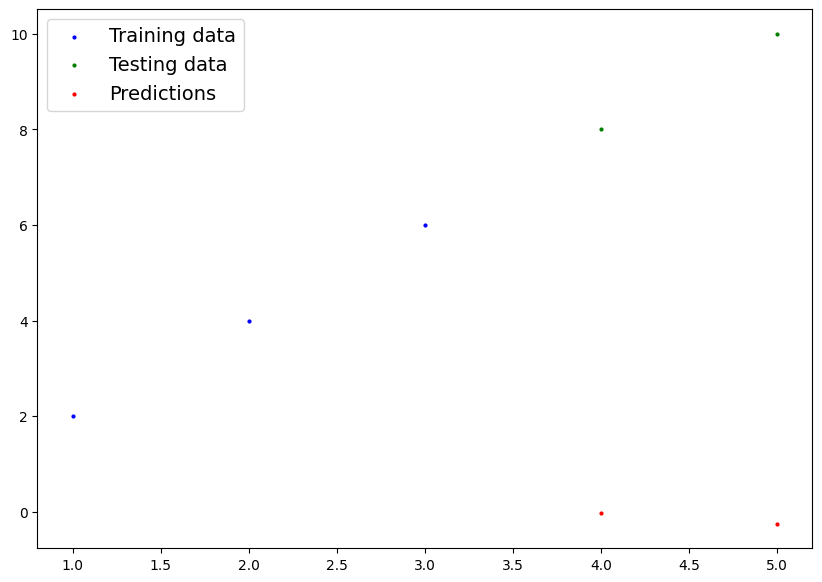

In [ ]:
plot_predictions(predictions=y_preds)